In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
datafilepath = r"./Dataset/diamonds.csv"

In [3]:
# pd.set_option('display.max_columns', 10) # Specify the maximum columns to be displayed 
df = pd.read_csv(datafilepath).drop('Unnamed: 0',1)
display(df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# Top is the mode of the features with their corresponding frequencies
df.loc[:, ['cut','color','clarity']].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [6]:
pd.crosstab(df['cut'],df['clarity'], margins = True)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,All
cut,,,,,,,,,
Fair,210,9,408,466,170,261,17,69,1610
Good,96,71,1560,1081,648,978,186,286,4906
Ideal,146,1212,4282,2598,3589,5071,2047,2606,21551
Premium,205,230,3575,2949,1989,3357,616,870,13791
Very Good,84,268,3240,2100,1775,2591,789,1235,12082
All,741,1790,13065,9194,8171,12258,3655,5066,53940


In [7]:
df['price'].quantile(q=[0.25, 0.5, 0.75]) # The first quantile, median, and third quantile

0.25     950.00
0.50    2401.00
0.75    5324.25
Name: price, dtype: float64

In [8]:
df.loc[:,['carat','depth', 'table','price']].describe()

,carat,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722
std,0.474011,1.432621,2.234491,3989.439738
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,950.000000
50%,0.700000,61.800000,57.000000,2401.000000
75%,1.040000,62.500000,59.000000,5324.250000
max,5.010000,79.000000,95.000000,18823.000000


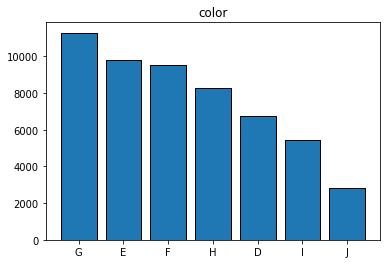

In [9]:
width = 0.35
x = [(i+1)*(1.25*width)-width for i in range(7)]
color_count = df['color'].value_counts()
plt.bar(x, color_count, width, edgecolor='black')
plt.xticks(x, color_count.index)
plt.title('color')
plt.show()

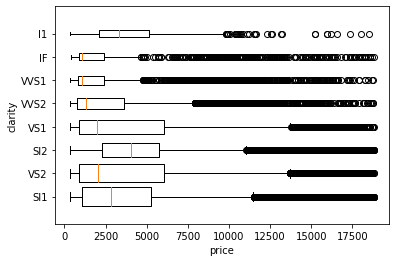

In [10]:
clarity_counts = df['clarity'].value_counts()
count_sum = clarity_counts.sum()
widths = [count/count_sum+0.1 for count in clarity_counts]
max_width = max(widths)
y = [(i+1)*(1.25*max_width)-max_width for i in range(clarity_counts.shape[0])]
for yi,width,clar in zip(y,widths,clarity_counts.index):
    plt.boxplot(df[df['clarity']==clar]['price'],positions=[yi],widths=width,vert=False,)
#     print(yi,clar)
#     break
plt.yticks(y,clarity_counts.index)
plt.xlabel('price')
plt.ylabel('clarity')
plt.show()

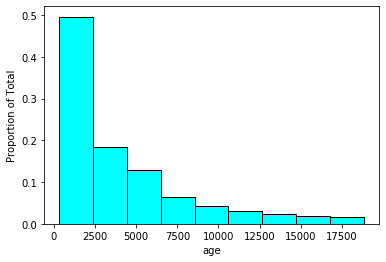

In [11]:
weights = np.ones_like(df.price)/df.price.count()
plt.hist(df.price,bins=9,weights=weights,facecolor='cyan',
        edgecolor='black',linewidth=1)
plt.xlabel('age')
plt.ylabel('Proportion of Total')
plt.show()

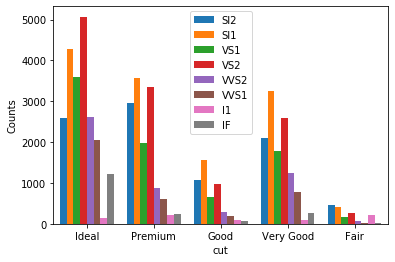

In [15]:
sns.countplot(x='cut', hue='clarity', data=df, 
              hue_order=df['clarity'].unique(),
             saturation=1)
plt.legend(loc='upper center' )
plt.xlabel('cut')
plt.ylabel('Counts')
plt.show()

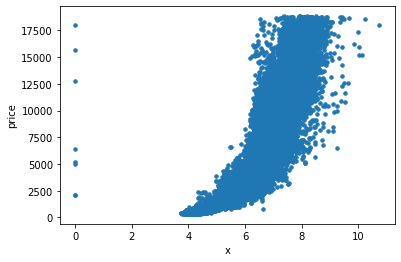

In [34]:
plt.scatter(df['x'],df['price'],s=12,marker='o')
plt.xlabel('x')
plt.ylabel('price')
plt.show()

In [21]:
dictScore = {'Student':[1,2,3,4,5],
            'Before':[60,60,70,80,75],
            'After': [80,80,75,80,73]}
dfScore = pd.DataFrame(dictScore)
dfScore

,Student,Before,After
0,1,60,80
1,2,60,80
2,3,70,75
3,4,80,80
4,5,75,73


In [27]:
pd.melt(dfScore, id_vars=['Student'], 
        value_vars=['Before','After'],
        var_name='Time',value_name='Score')

,Student,Time,Score
0,1,Before,60
1,2,Before,60
2,3,Before,70
3,4,Before,80
4,5,Before,75
5,1,After,80
6,2,After,80
7,3,After,75
8,4,After,80
9,5,After,73


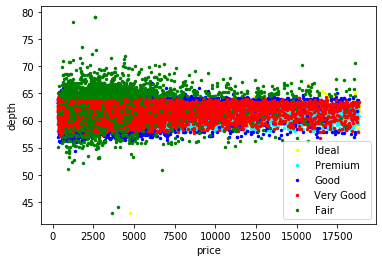

In [50]:
colors = ['yellow', 'cyan', 'blue', 'red', 'green']
markers = ['o', 'o', 'o', 'o', 'o']
styles = dict([(cuts,[marker,color]) for cuts,marker,color in zip(
                df['cut'].unique(),markers,colors)])
for key in styles:
    grp = df[df['cut']==key]
    plt.scatter(grp['price'],grp['depth'],s=12,
                marker=styles[key][0],c=styles[key][1],
               linewidth=0)
plt.xlabel('price')
plt.ylabel('depth')
plt.legend(styles.keys())
plt.show()

In [36]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

array(['a', 'b', 'd', 'c'], dtype='<U1')